# House Price Prediction Using Linear Regression 

# Aim:

###  Predict the price of House based on Income,House age,Number of rooms,Number of bedrooms and      Population.

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score  
from sklearn.metrics import mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

# Load  and read the data

In [2]:
data=pd.read_csv("USA_Housing.csv")
data

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.94414,7.830362,6.137356,3.46,22837.36103,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.27543,6.999135,6.576763,4.02,25616.11549,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.68689,7.250591,4.805081,2.13,33266.14549,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.33124,5.534388,7.130144,5.44,42625.62016,1.198657e+06,USS Wallace\nFPO AE 73316


# Drop the address column

In [3]:
data = data.drop("Address", axis=1)

# Rename columns

In [4]:
data=data.rename(columns={"Avg. Area Income":"income","Avg. Area House Age":"age",
                          "Avg. Area Number of Rooms":"rooms","Avg. Area Number of Bedrooms":"bedrooms",
                          "Area Population":"population"})

# To print top 5 rows

In [5]:
data.head()

,income,age,rooms,bedrooms,population,Price
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05


# To print bottom  5 rows

In [6]:
data.tail()

,income,age,rooms,bedrooms,population,Price
4995,60567.94414,7.830362,6.137356,3.46,22837.36103,1060193.786
4996,78491.27543,6.999135,6.576763,4.02,25616.11549,1482617.729
4997,63390.68689,7.250591,4.805081,2.13,33266.14549,1030729.583
4998,68001.33124,5.534388,7.130144,5.44,42625.62016,1198656.872
4999,65510.58180,5.992305,6.792336,4.07,46501.28380,1298950.480


# To print random data

In [7]:
data.sample(5)

,income,age,rooms,bedrooms,population,Price
4481,80484.87001,4.509880,5.771422,2.30,28076.97938,1131225.760
725,67547.87107,6.524721,7.381225,4.18,28131.71902,1150658.595
3321,88508.05348,6.417397,5.811248,4.08,36001.26253,1660295.796
4659,62946.42010,6.133815,6.973450,2.30,42312.08202,1261491.425
4009,71135.38992,6.469122,7.834606,3.26,15441.82724,1088699.399


# To check the rows and columns

In [8]:
data.shape

(5000, 6)

# To check the datatype

In [9]:
data.dtypes

income        float64
age           float64
rooms         float64
bedrooms      float64
population    float64
Price         float64
dtype: object

# To print the index

In [10]:
data.index

RangeIndex(start=0, stop=5000, step=1)

# To print number of dimensions

In [11]:
data.ndim

2

# To check the size of the data

In [12]:
data.size

30000

# To print columns names

In [13]:
data.columns

Index(['income', 'age', 'rooms', 'bedrooms', 'population', 'Price'], dtype='object')

In [14]:
data.isna().sum()

income        0
age           0
rooms         0
bedrooms      0
population    0
Price         0
dtype: int64

# To check whether data type is empty

In [15]:
data.empty

False

# Check the duplicated value

In [16]:
data.duplicated().sum()

0

# Print information of a dataset

In [17]:
data.info

<bound method DataFrame.info of            income       age     rooms  bedrooms   population         Price
0     79545.45857  5.682861  7.009188      4.09  23086.80050  1.059034e+06
1     79248.64245  6.002900  6.730821      3.09  40173.07217  1.505891e+06
2     61287.06718  5.865890  8.512727      5.13  36882.15940  1.058988e+06
3     63345.24005  7.188236  5.586729      3.26  34310.24283  1.260617e+06
4     59982.19723  5.040555  7.839388      4.23  26354.10947  6.309435e+05
...           ...       ...       ...       ...          ...           ...
4995  60567.94414  7.830362  6.137356      3.46  22837.36103  1.060194e+06
4996  78491.27543  6.999135  6.576763      4.02  25616.11549  1.482618e+06
4997  63390.68689  7.250591  4.805081      2.13  33266.14549  1.030730e+06
4998  68001.33124  5.534388  7.130144      5.44  42625.62016  1.198657e+06
4999  65510.58180  5.992305  6.792336      4.07  46501.28380  1.298950e+06

[5000 rows x 6 columns]>

# To print statistical information

In [18]:
data.describe()

,income,age,rooms,bedrooms,population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562390,5.322283,6.299250,3.140000,29403.928700,9.975771e+05
50%,68804.286405,5.970429,7.002902,4.050000,36199.406690,1.232669e+06
75%,75783.338665,6.650808,7.665871,4.490000,42861.290770,1.471210e+06
max,107701.748400,9.519088,10.759588,6.500000,69621.713380,2.469066e+06


In [19]:
data.describe(include="all")

,income,age,rooms,bedrooms,population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562390,5.322283,6.299250,3.140000,29403.928700,9.975771e+05
50%,68804.286405,5.970429,7.002902,4.050000,36199.406690,1.232669e+06
75%,75783.338665,6.650808,7.665871,4.490000,42861.290770,1.471210e+06
max,107701.748400,9.519088,10.759588,6.500000,69621.713380,2.469066e+06


# Check the relationship between data

In [20]:
data.corr()

,income,age,rooms,bedrooms,population,Price
income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


# Heatmap

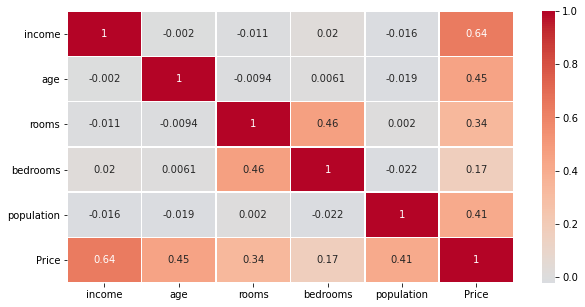

In [21]:
plt.figure(figsize=(10,5))
sns.heatmap(data.corr(), annot=True,linewidth=.5,center=0,cmap='coolwarm')
plt.show()

### Here price and income are more correlated than others

# To check for negative values in the dataset

In [22]:
print((data==-1).sum()[(data==-1).sum()>0])

Series([], dtype: int64)


# To find the maximum values of all variables

In [23]:
data.apply(max)

income        1.077017e+05
age           9.519088e+00
rooms         1.075959e+01
bedrooms      6.500000e+00
population    6.962171e+04
Price         2.469066e+06
dtype: float64

# To find the minimum values of all variables

In [24]:
data.apply(min)

income        17796.631190
age               2.644304
rooms             3.236194
bedrooms          2.000000
population      172.610686
Price         15938.657920
dtype: float64

# To sort values by house price

In [25]:
Hprice=data.sort_values(by="Price",ascending=False)
Hprice

,income,age,rooms,bedrooms,population,Price
465,90592.46961,7.700132,9.708803,5.19,37223.87617,2.469066e+06
2719,101599.67060,7.798746,7.480512,6.39,37523.86467,2.370231e+06
693,107701.74840,7.143522,8.518608,3.29,37619.43993,2.332111e+06
924,83814.10116,8.571797,7.392164,3.39,51538.05680,2.330290e+06
1248,94733.97128,7.885829,7.162373,5.41,46314.69005,2.318286e+06
...,...,...,...,...,...,...
1661,48735.92451,5.543730,6.091906,2.43,19682.34729,1.515271e+05
1459,35963.33081,3.438547,8.264122,3.28,24435.77730,1.430274e+05
1799,60167.67261,4.590613,3.950973,4.06,16811.30329,8.859177e+04
1271,37971.20757,4.291224,5.807510,3.24,33267.76773,3.114052e+04


# Highest house price 

In [26]:
Hprice["Price"].iloc[0]

2469065.594

# Lowest house price 

In [27]:
Hprice["Price"].iloc[-1]

15938.65792

# Counts of each columns

In [28]:
data.income.value_counts()

49220.03779    1
46517.17527    1
74369.66860    1
91937.80789    1
71743.48382    1
              ..
73148.51334    1
58895.33095    1
69031.90888    1
81602.53935    1
61657.04354    1
Name: income, Length: 5000, dtype: int64

In [29]:
data.age.value_counts()

6.052910    1
6.986763    1
7.237116    1
6.036275    1
5.981856    1
           ..
5.642007    1
6.746467    1
4.928242    1
6.072996    1
6.763792    1
Name: age, Length: 5000, dtype: int64

In [30]:
data.rooms.value_counts()

5.475253    1
8.017889    1
4.415753    1
8.839164    1
5.539287    1
           ..
7.915126    1
8.039701    1
6.528580    1
6.278729    1
9.666899    1
Name: rooms, Length: 5000, dtype: int64

In [31]:
data.bedrooms.value_counts()

4.38    46
3.17    41
3.40    40
3.16    39
4.41    38
        ..
6.17     7
5.42     6
6.01     6
6.02     6
6.42     5
Name: bedrooms, Length: 255, dtype: int64

In [32]:
data.population.value_counts()

26155.68862    1
36009.70034    1
59262.53930    1
37499.00550    1
43728.80349    1
              ..
23214.70296    1
15554.28418    1
27809.98654    1
32299.06465    1
50182.39838    1
Name: population, Length: 5000, dtype: int64

In [33]:
data.Price.value_counts()

6.953863e+05    1
4.946090e+05    1
1.331656e+06    1
1.194440e+06    1
1.455555e+06    1
               ..
1.186020e+06    1
1.246485e+06    1
1.078713e+06    1
1.414287e+06    1
1.692336e+06    1
Name: Price, Length: 5000, dtype: int64

# Data Visualization

# Distplot of prices of houses

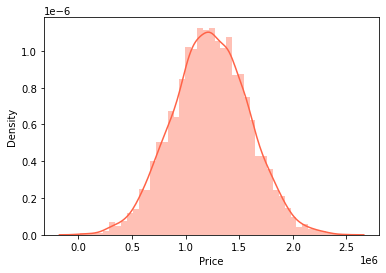

In [34]:
sns.distplot(data.Price,color="tomato")
plt.show()

# kdeplot Of prices of houses

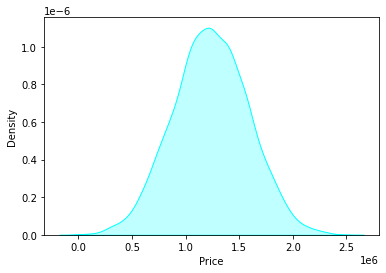

In [35]:
sns.kdeplot(data['Price'],color='cyan',shade=True)
plt.show()

# Swarmplot of prices of houses

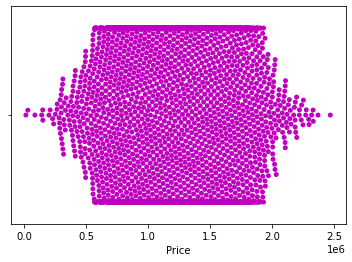

In [36]:
sns.swarmplot(data['Price'],color='m')
plt.show()

# Boxplot of average age of house

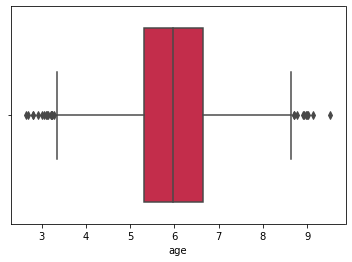

In [37]:
sns.boxplot(data["age"],color='crimson')
plt.show()

# Boxplot of avg. income of residents of the city house

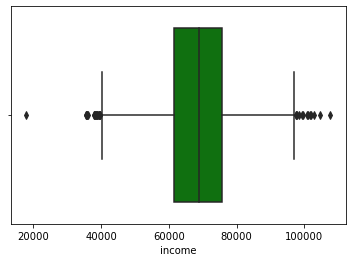

In [38]:
sns.boxplot(data["income"],color="green")
plt.show()

# Violinplot of avg number of rooms for houses in same city

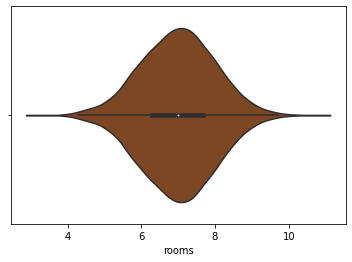

In [39]:
sns.violinplot(x=data.rooms,color='saddlebrown')
plt.show()

# Violinplot of avg number of  bedrooms for houses in same city

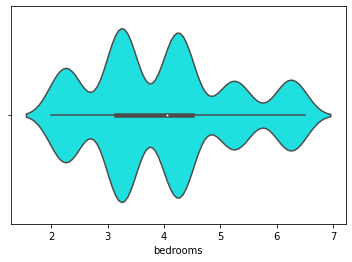

In [40]:
sns.violinplot(x=data.bedrooms,color='cyan')
plt.show()

# Distplot of Population of city house is located in

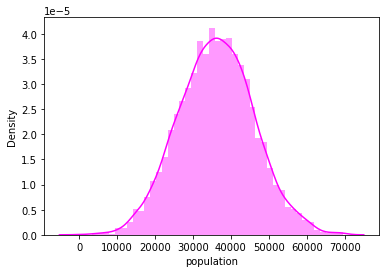

In [41]:
sns.distplot(data.population,color="magenta")
plt.show()

# Exploring  dataset with pairplots

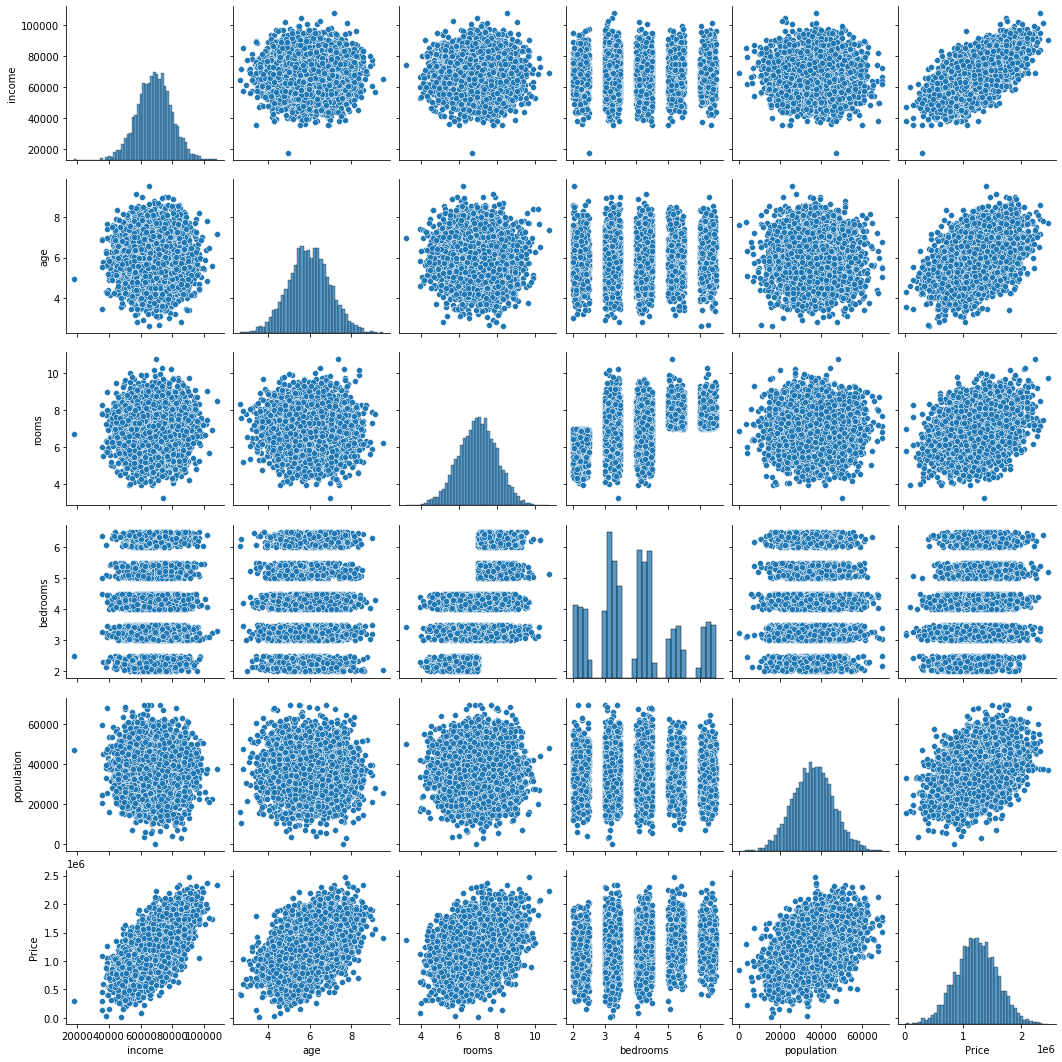

In [42]:
sns.pairplot(data)
plt.show()

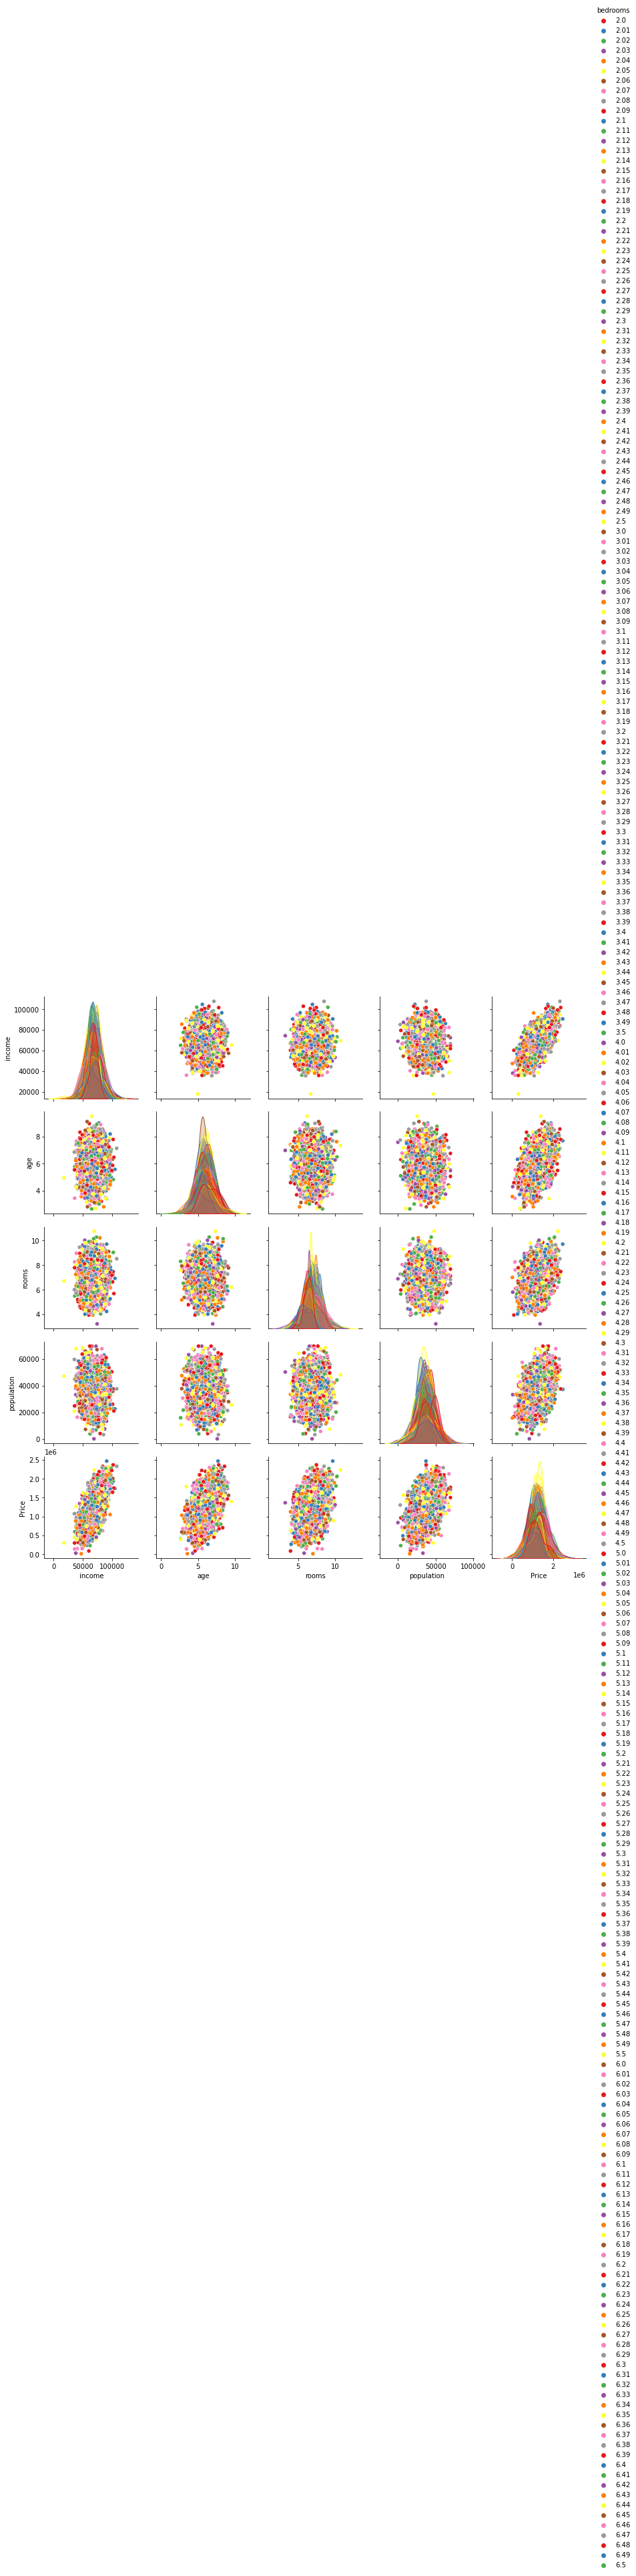

In [43]:
sns.pairplot(data,hue="bedrooms",palette='Set1')
plt.show()

# Regression Plot of Age Vs HousePrice

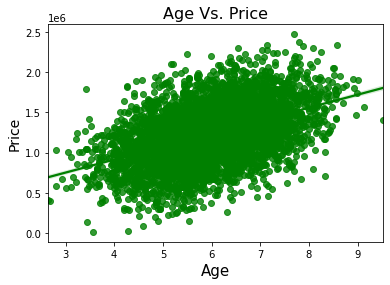

In [44]:
sns.regplot(x=data["age"],y=data["Price"],color="g")
plt.title("Age Vs. Price",size=16)
plt.xlabel("Age",size=15)
plt.ylabel("Price",size=14)
plt.show()

# Regression Plot of Income Vs HousePrice

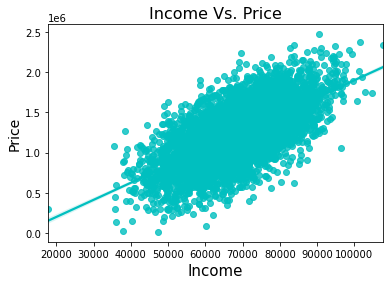

In [45]:
sns.regplot(x=data["income"],y=data["Price"],color="c")
plt.title("Income Vs. Price",size=16)
plt.xlabel("Income",size=15)
plt.ylabel("Price",size=14)
plt.show()

# Regression Plot of Room Vs HousePrice

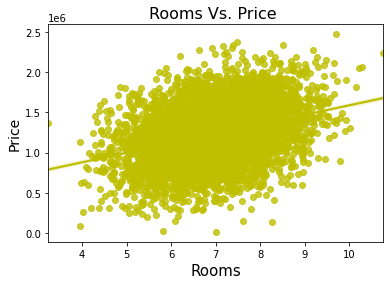

In [46]:
sns.regplot(x=data["rooms"],y=data["Price"],color="y")
plt.title("Rooms Vs. Price ",size=16)
plt.xlabel("Rooms",size=15)
plt.ylabel("Price",size=14)
plt.show()

# Regression Plot of Bedrooms Vs HousePrice

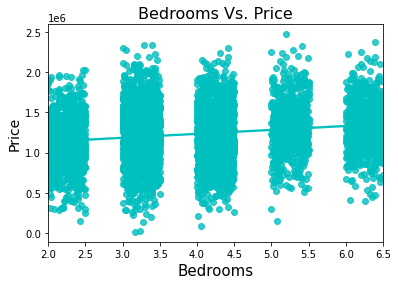

In [47]:
sns.regplot(x=data["bedrooms"],y=data["Price"],color="c")
plt.title("Bedrooms Vs. Price",size=16)
plt.xlabel("Bedrooms",size=15)
plt.ylabel("Price",size=14)
plt.show()


# Regression Plot of Population Vs HousePrice

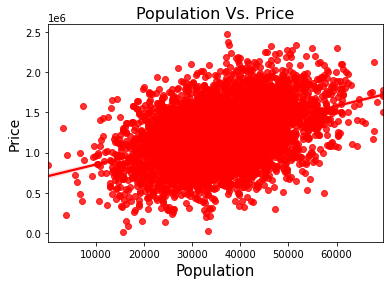

In [48]:
sns.regplot(x=data["population"],y=data["Price"],color="r")
plt.title("Population Vs. Price",size=16)
plt.xlabel("Population",size=15)
plt.ylabel("Price",size=14)
plt.show()

# Heat map

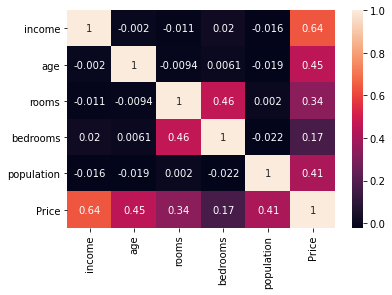

In [49]:
sns.heatmap(data.corr(), annot=True)
plt.show()

Here,income is highly correlated with price

# Model Building

# Define x and y

In [50]:

x = data[['income', 'age',"rooms",
               'bedrooms', 'population']]
y = data['Price']

# Display the shape and first few elements of our data

In [51]:
x[:5]

,income,age,rooms,bedrooms,population
0,79545.45857,5.682861,7.009188,4.09,23086.80050
1,79248.64245,6.002900,6.730821,3.09,40173.07217
2,61287.06718,5.865890,8.512727,5.13,36882.15940
3,63345.24005,7.188236,5.586729,3.26,34310.24283
4,59982.19723,5.040555,7.839388,4.23,26354.10947


In [52]:
print(x.shape)

(5000, 5)


In [53]:
y[:5]

0    1.059034e+06
1    1.505891e+06
2    1.058988e+06
3    1.260617e+06
4    6.309435e+05
Name: Price, dtype: float64

In [54]:
print(y.shape)

(5000,)


# Split the dataset in training set and test data

In [55]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=0)

# Train the model on training set

In [56]:
l=LinearRegression()
l.fit(x_train,y_train)
print("train test complete")

train test complete


# Predict the test result

In [57]:
y_pred=l.predict(x_test)
y_pred

array([ 971904.48272472,  955193.77151043,  908142.23363048,
        494847.17539987,  718960.75464356, 1050579.68517449,
        713626.33549396,  787349.92245167, 1803188.92703679,
       1537949.2538927 ,  743899.82260709, 1146155.54042631,
       2119763.66831712,  974545.30889287, 1152090.74211725,
        875847.41058974, 1105260.87638979,  802536.96499081,
       1204769.91505257, 1408245.02555224, 1140726.05228005,
       1063463.58370096, 1436185.66939031, 1176072.76457501,
       1296959.01208427, 1120962.11625119, 1118447.57092881,
       1372302.61698351, 1588406.66916548, 1194372.04126966,
       1561643.42786821, 2006204.66042486,  892162.4080135 ,
       1325624.68389847, 1184310.88164916,  750033.04073162,
       1083100.10655059, 1578336.67608587, 1260126.20727371,
       1334051.32049038, 1595668.16937175,  962310.58478669,
       1219803.18725257, 1116022.52548678, 1035208.37064104,
       1701172.34673232, 1017052.86020388, 1617386.56449658,
       1153658.31074319,

In [58]:
l.predict([[79545.45857,5.682861,7.009188,4.09,23086.80050 ]])

array([1223688.79655131])

In [59]:
d1=pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
d1

,Actual,Predicted
398,8.942511e+05,9.719045e+05
3833,9.329794e+05,9.551938e+05
4836,9.207479e+05,9.081422e+05
4572,6.918549e+05,4.948472e+05
636,7.327332e+05,7.189608e+05
...,...,...
1928,1.100152e+06,1.295405e+06
4366,1.174779e+06,1.276332e+06
3550,1.388596e+06,1.427426e+06
2189,1.241699e+06,1.163525e+06


# Evaluate the model

In [60]:
r2_score(y_test,y_pred)

0.9213680850442499

 Here r2 accuracy score is .9 leading to 1,so it is linear.

In [61]:
print("Mean Absolute Error",mean_absolute_error(y_test,y_pred))

Mean Absolute Error 81188.89573434138


# Scatter plot of Actual and Predicted value

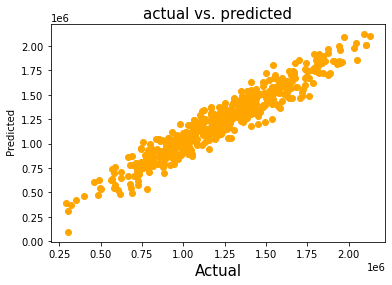

In [62]:
plt.scatter(y_test,y_pred,color="orange")
plt.title("actual vs. predicted",size=15)
plt.xlabel("Actual",size=15)
plt.ylabel(" Predicted",size=10)
plt.show()

# Regression Plot of Actual and Predicted value

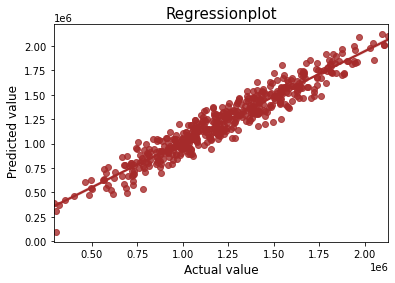

In [63]:

sns.regplot(x=y_test,y=y_pred,color="brown")
plt.title("Regressionplot",size=15)
plt.xlabel("Actual value",size=12)
plt.ylabel(" Predicted value",size=12)
plt.show()


### In the above regression plot, we see data is in a line form, which means our model has done good prediction

# CONCLUSION

### Here I use multiple linear regression to predict the prices of houses more accurately using different variables. 
### This stream learning model will be updated whenever new houce price data are available,
### and provided to model, so the model continuously evolves over time,
### and can capture the changing pattern of house prices.


# THANK YOU